In [2]:
import psutil
import platform

print(platform.system())  # 操作系统名称
print(platform.release())  # 操作系统版本
print(platform.machine())  # 计算机架构
print(platform.processor())  # 处理器类型

# CPU 信息
print(psutil.cpu_count())  # CPU 核数
print(psutil.cpu_freq())  # CPU 频率

# 内存信息
print(psutil.virtual_memory())  # 内存总量、可用内存、已用内存等

Windows
11
AMD64
Intel64 Family 6 Model 154 Stepping 3, GenuineIntel
20
scpufreq(current=2300.0, min=0.0, max=2300.0)
svmem(total=16890978304, available=3218743296, percent=80.9, used=13672235008, free=3218743296)


In [3]:
# 默认情况下，索引是整数，从0开始
import pandas as pd
import numpy as np
numbers = np.random.randn(5)
s = pd.Series(numbers)
s

0    1.754090
1   -1.255626
2   -0.776471
3   -0.367090
4   -0.549705
dtype: float64

In [4]:
# 可以从任何类似数组的结构（例如，numpy数组、Python列表、字典）创建pandas Series
# 可以用其他集合作为索引
idx = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(numbers, index=idx)
s

a    1.754090
b   -1.255626
c   -0.776471
d   -0.367090
e   -0.549705
dtype: float64

In [5]:
# 可以从字典创建一个Series。键成为索引
d = {'a': 0, 'b' : 1, 'c': 2}
s = pd.Series(d)
s

a    0
b    1
c    2
dtype: int64

In [6]:
# Series支持切片，但不支持负索引。
s = pd.Series([2, 3, 5, 7, 11])
s[1:3]


1    3
2    5
dtype: int64

In [7]:
s = pd.Series([2, 3, 5, 7, 11], index=['a', 'a', 'a', 'a', 'a'])
s['a']

a     2
a     3
a     5
a     7
a    11
dtype: int64

In [8]:
# Series对象就像np.ndarray对象一样，因此它们支持所有相同类型的切片操作
s[s>3]

a     5
a     7
a    11
dtype: int64

In [9]:
d = {'dog': 2, 'cat':3, 'bird':5}
s = pd.Series(d)
s ** 2

dog      4
cat      9
bird    25
dtype: int64

In [10]:
s['dog'] = 1
s

dog     1
cat     3
bird    5
dtype: int64

In [11]:
s.name = 'animals'
s

dog     1
cat     3
bird    5
Name: animals, dtype: int64

In [12]:
s.rename('mammal')

dog     1
cat     3
bird    5
Name: mammal, dtype: int64

In [13]:
s = pd.Series(['dog', 'goat', 'skunk'])
s.map(lambda s:len(s))

0    3
1    4
2    5
dtype: int64

In [14]:
s = pd.Series(['fruit', 'animal', 'animal', 'fruit', 'fruit'], index=['apple', 'cat', 'goat', 'banana', 'kiwi'])
s

apple      fruit
cat       animal
goat      animal
banana     fruit
kiwi       fruit
dtype: object

In [15]:
t = pd.Series({'fruit':0, 'animal':1})
t

fruit     0
animal    1
dtype: int64

In [16]:
s.map(t)

apple     0
cat       1
goat      1
banana    0
kiwi      0
dtype: int64

In [17]:
# 从字典创建DataFrame，键成为列名。值成为字典的行。
# 对于给定列未指定的行，接收NaN。
d = {'A':pd.Series([1,2,3], index=['cat','dog','bird']),
    'B':{'cat':3.14, 'dog':2.718, 'bird':1.618, 'goat':0.5772}}
df = pd.DataFrame(d)
df

,A,B
bird,3.0,1.6180
cat,1.0,3.1400
dog,2.0,2.7180
goat,NaN,0.5772


In [18]:
d = {'Undergrad' : pd.Series(['UMich', 'Stanford', 'Princeton', 'Columbia'],
                             index=['Ford', 'Hoover', 'Wilson', 'Obama']),
     'PhD' : {'Wilson':'Johns Hopkins'},
     'JD' : {'Ford':'Yale','Obama':'Harvard'},
     'Terms': pd.Series([1,1,2,2]) }
presidents = pd.DataFrame(d)
presidents

,Undergrad,PhD,JD,Terms
Ford,UMich,NaN,Yale,NaN
Hoover,Stanford,NaN,NaN,NaN
Obama,Columbia,NaN,Harvard,NaN
Wilson,Princeton,Johns Hopkins,NaN,NaN
0,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,2.0


In [19]:
presidents.columns

Index(['Undergrad', 'PhD', 'JD', 'Terms'], dtype='object')

In [20]:
presidents.index

Index(['Ford', 'Hoover', 'Obama', 'Wilson', 0, 1, 2, 3], dtype='object')

In [21]:
d = {'Undergrad' : pd.Series(['UMich', 'Stanford', 'Princeton', 'Columbia'],
                             index=['Ford', 'Hoover', 'Wilson', 'Obama']),
     'PhD' : {'Wilson':'Johns Hopkins'},
     'JD' : {'Ford':'Yale','Obama':'Harvard'},
     'Terms': pd.Series([1,1,2,2], index=['Ford', 'Hoover', 'Wilson', 'Obama']) }
presidents = pd.DataFrame(d)
presidents['Nobels'] = [0,0,1,1]
presidents

,Undergrad,PhD,JD,Terms,Nobels
Ford,UMich,NaN,Yale,1,0
Hoover,Stanford,NaN,NaN,1,0
Obama,Columbia,NaN,Harvard,2,1
Wilson,Princeton,Johns Hopkins,NaN,2,1


In [22]:
# 标量在行中传播播。
presidents['Fields Medals'] = 0
presidents

,Undergrad,PhD,JD,Terms,Nobels,Fields Medals
Ford,UMich,NaN,Yale,1,0,0
Hoover,Stanford,NaN,NaN,1,0,0
Obama,Columbia,NaN,Harvard,2,1,0
Wilson,Princeton,Johns Hopkins,NaN,2,1,0


In [23]:
del presidents['Fields Medals']
presidents

,Undergrad,PhD,JD,Terms,Nobels
Ford,UMich,NaN,Yale,1,0
Hoover,Stanford,NaN,NaN,1,0
Obama,Columbia,NaN,Harvard,2,1
Wilson,Princeton,Johns Hopkins,NaN,2,1


In [24]:
# df.loc按其行标签选择行。df.iloc按其整数行标签（从0开始）选择行。
presidents.loc['Obama']

Undergrad    Columbia
PhD               NaN
JD            Harvard
Terms               2
Nobels              1
Name: Obama, dtype: object

In [25]:
presidents.iloc[2]

Undergrad    Columbia
PhD               NaN
JD            Harvard
Terms               2
Nobels              1
Name: Obama, dtype: object

In [26]:
# 多行
presidents.iloc[1:3], presidents[1:3]

(       Undergrad  PhD       JD  Terms  Nobels
 Hoover  Stanford  NaN      NaN      1       0
 Obama   Columbia  NaN  Harvard      2       1,
        Undergrad  PhD       JD  Terms  Nobels
 Hoover  Stanford  NaN      NaN      1       0
 Obama   Columbia  NaN  Harvard      2       1)

In [27]:
# 按其名称选择列。
presidents['Undergrad']

Ford          UMich
Hoover     Stanford
Obama      Columbia
Wilson    Princeton
Name: Undergrad, dtype: object

In [28]:
# 获得多列
presidents[['Undergrad', 'PhD']]

,Undergrad,PhD
Ford,UMich,NaN
Hoover,Stanford,NaN
Obama,Columbia,NaN
Wilson,Princeton,Johns Hopkins


In [29]:
# 布尔表达式选择行
type(presidents['Terms']<2), presidents[presidents['Terms']<2]

(pandas.core.series.Series,
        Undergrad  PhD    JD  Terms  Nobels
 Ford       UMich  NaN  Yale      1       0
 Hoover  Stanford  NaN   NaN      1       0)

In [30]:
df1 = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])
df1+df2

,A,B,C,D
0,0.061177,-0.194038,-0.424845,NaN
1,0.830433,-1.575588,0.171310,NaN
2,0.933202,-2.136887,-0.580832,NaN
3,-2.029443,0.803231,0.611888,NaN
4,-1.024011,-1.683306,-0.344807,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN


In [31]:
df = pd.DataFrame(np.random.randn(4, 2), columns=['A', 'B'])
df

,A,B
0,0.759576,0.858931
1,-0.022221,1.730997
2,0.655215,-0.683693
3,0.091297,-0.142306


In [32]:
df - df.iloc[0]

,A,B
0,0.000000,0.000000
1,-0.781797,0.872066
2,-0.104361,-1.542623
3,-0.668279,-1.001237


In [33]:
print((df>0).any())
print('*************************')
print((df>0).all())

A    True
B    True
dtype: bool
*************************
A    False
B    False
dtype: bool


In [34]:
# values属性将dataframe中的元素存储在一个numpy数组中。
df.values

array([[ 0.75957611,  0.85893056],
       [-0.02222095,  1.73099673],
       [ 0.65521509, -0.68369292],
       [ 0.09129698, -0.14230617]])

In [35]:
df.T @ df

,A,B
A,1.015092,0.153001
B,0.153001,4.221798


In [36]:
df * df

,A,B
0,0.576956,0.737762
1,0.000494,2.996350
2,0.429307,0.467436
3,0.008335,0.020251


In [37]:
presidents.dropna(axis=0)

,Undergrad,PhD,JD,Terms,Nobels


In [38]:
presidents.dropna(axis=1)

,Undergrad,Terms,Nobels
Ford,UMich,1,0
Hoover,Stanford,1,0
Obama,Columbia,2,1
Wilson,Princeton,2,1


In [39]:
baseball = pd.read_csv('baseball.csv')
# head()方法显示DataFrame的前几行）。tail()显示最后几行。
baseball.head(5)

,id,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
44,forceda01,1871,1,WS3,NaN,32,162,45,45,9,...,29.0,8.0,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN
68,mathebo01,1871,1,FW1,NaN,19,89,15,24,3,...,10.0,2.0,1.0,2,0.0,NaN,NaN,NaN,NaN,NaN
99,startjo01,1871,1,NY2,NaN,33,161,35,58,5,...,34.0,4.0,2.0,3,0.0,NaN,NaN,NaN,NaN,NaN
102,suttoez01,1871,1,CL1,NaN,29,128,35,45,3,...,23.0,3.0,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN


In [40]:
df.mean(axis=0) # 列的均值

A    0.370967
B    0.440982
dtype: float64

In [41]:
df.mean(axis=1) # 行的均值

0    0.809253
1    0.854388
2   -0.014239
3   -0.025505
dtype: float64

In [42]:
df.apply(np.mean, axis=0)

A    0.370967
B    0.440982
dtype: float64

In [43]:
df.apply(np.mean, axis=1)

0    0.809253
1    0.854388
2   -0.014239
3   -0.025505
dtype: float64

In [44]:
df.apply(np.exp)

,A,B
0,2.137370,2.360635
1,0.978024,5.646279
2,1.925557,0.504750
3,1.095594,0.867356


In [45]:
tsdf = pd.DataFrame(np.random.randn(10, 3),
                    columns=['DOW', 'NASDAQ', 'S&P500'],
                    index=pd.date_range('1/1/2000', periods=10))
tsdf.head()

,DOW,NASDAQ,S&P500
2000-01-01,0.555845,1.009969,-1.190773
2000-01-02,-1.748919,-1.348599,0.608051
2000-01-03,0.107232,1.706671,2.289426
2000-01-04,0.632826,1.554259,-0.549232
2000-01-05,1.794205,-1.233810,0.211847


In [46]:
import warnings
warnings.filterwarnings('ignore')
tsdf.agg([np.median, np.mean, np.std])

,DOW,NASDAQ,S&P500
median,0.040245,-0.543082,-0.264140
mean,-0.012043,-0.046489,0.029724
std,1.080521,1.376362,1.022590


In [47]:
# agg()可以接受一个字典，其键是列名，值是函数。
tsdf.agg({'DOW':'mean',
          'NASDAQ':'median',
          'S&P500':'max'})

DOW      -0.012043
NASDAQ   -0.543082
S&P500    2.289426
dtype: float64

In [48]:
df = pd.DataFrame({'A': ['cat', 'dog', 'bird'],
                   'B': ['unicorn','chupacabra','pixie']})
df.applymap(lambda s: s.upper())

,A,B
0,CAT,UNICORN
1,DOG,CHUPACABRA
2,BIRD,PIXIE


In [49]:
s

apple      fruit
cat       animal
goat      animal
banana     fruit
kiwi       fruit
dtype: object

In [50]:
for i in s:
    print(i)

fruit
animal
animal
fruit
fruit


In [51]:
tsdf.head()

,DOW,NASDAQ,S&P500
2000-01-01,0.555845,1.009969,-1.190773
2000-01-02,-1.748919,-1.348599,0.608051
2000-01-03,0.107232,1.706671,2.289426
2000-01-04,0.632826,1.554259,-0.549232
2000-01-05,1.794205,-1.233810,0.211847


In [52]:
for i in tsdf:
    print(i)

DOW
NASDAQ
S&P500


In [53]:
s1 = pd.Series(np.random.randn(1000))
s2 = pd.Series(np.random.randn(1000))
s1.cov(s2)

-0.0035194103854995634

In [54]:
tsdf.head(3)

,DOW,NASDAQ,S&P500
2000-01-01,0.555845,1.009969,-1.190773
2000-01-02,-1.748919,-1.348599,0.608051
2000-01-03,0.107232,1.706671,2.289426


In [55]:
tsdf.cov()

,DOW,NASDAQ,S&P500
DOW,1.167526,0.253206,-0.331411
NASDAQ,0.253206,1.894373,0.146538
S&P500,-0.331411,0.146538,1.045690


In [56]:
tsdf.corr(method='spearman')

,DOW,NASDAQ,S&P500
DOW,1.000000,0.236364,-0.296970
NASDAQ,0.236364,1.000000,0.078788
S&P500,-0.296970,0.078788,1.000000


In [57]:
import pandas as pd
import numpy as np
s = pd.Series(np.random.randn(5), index=list('abcde'))
s

a    1.216196
b    0.777482
c   -0.246684
d   -1.470868
e    0.440191
dtype: float64

In [58]:
s.rank()


a    5.0
b    4.0
c    2.0
d    1.0
e    3.0
dtype: float64

In [59]:
tsdf.rank(axis=0)

,DOW,NASDAQ,S&P500
2000-01-01,7.0,7.0,1.0
2000-01-02,1.0,2.0,8.0
2000-01-03,6.0,10.0,10.0
2000-01-04,8.0,8.0,4.0
2000-01-05,10.0,4.0,7.0
2000-01-06,4.0,9.0,5.0
2000-01-07,5.0,1.0,6.0
2000-01-08,3.0,3.0,2.0
2000-01-09,9.0,5.0,3.0
2000-01-10,2.0,6.0,9.0


In [60]:
tsdf.rank(axis=1)

,DOW,NASDAQ,S&P500
2000-01-01,2.0,3.0,1.0
2000-01-02,1.0,2.0,3.0
2000-01-03,1.0,2.0,3.0
2000-01-04,2.0,3.0,1.0
2000-01-05,3.0,1.0,2.0
2000-01-06,2.0,3.0,1.0
2000-01-07,3.0,1.0,2.0
2000-01-08,3.0,1.0,2.0
2000-01-09,3.0,2.0,1.0
2000-01-10,1.0,2.0,3.0


In [61]:
df = pd.DataFrame({'A' : ['plant', 'animal', 'plant', 'plant'],
                   'B' : ['apple', 'goat', 'kiwi', 'grape'],
                   'C' : np.random.randn(4),
                   'D' : np.random.randn(4)})
df

,A,B,C,D
0,plant,apple,-0.230037,0.216062
1,animal,goat,0.223778,-0.725920
2,plant,kiwi,0.538707,-1.015244
3,plant,grape,-0.828536,1.010723


In [62]:
df.groupby('A')

In [63]:
# 在组‘A’上拆分，然后在每个组内计算平均值。
# 注意，对于不支持平均值的列将被移除，所以列‘B’不会出现在结果中。
df.groupby('A')[['C', 'D']].mean()

,C,D
A,,
animal,0.223778,-0.725920
plant,-0.173289,0.070513


In [64]:
# 构建一个层次化索引的Series（即，多索引），记录（虚构的）按专业和惯用手的学生分数。
arrs = [['math', 'math', 'econ', 'econ', 'stats', 'stats'],
          ['left', 'right', 'left', 'right', 'left', 'right']]
index = pd.MultiIndex.from_arrays(arrs, names=['major', 'handedness'])
s = pd.Series(np.random.randn(6), index=index)
s

major  handedness
math   left          1.374531
       right        -0.674679
econ   left          0.385960
       right        -0.219831
stats  left          3.479059
       right         0.423206
dtype: float64

In [65]:
# 假设我想在忽略惯用手的情况下按专业得到平均分数。
# 按层次结构的0级（即，‘major’）进行分组，并取平均值
s.groupby('major').mean()

major
econ     0.083065
math     0.349926
stats    1.951133
dtype: float64

In [66]:
import pandas as pd
df = pd.DataFrame({
    'A': ['a', 'a', 'b', 'b', 'c', 'c'],
    'B': [1, 3, 3, 4, 5, 6],
})
zscore = lambda x: (x - x.mean()) / x.std()

# 对数据框架进行分组，并对分组后的数据进行转换
df['B_mean'] = df.groupby('A')['B'].transform('mean')
df['B_std'] = df.groupby('A')['B'].transform('std')
df['Z_Score'] = df.groupby('A')['B'].transform(zscore)

print(df)

   A  B  B_mean     B_std   Z_Score
0  a  1     2.0  1.414214 -0.707107
1  a  3     2.0  1.414214  0.707107
2  b  3     3.5  0.707107 -0.707107
3  b  4     3.5  0.707107  0.707107
4  c  5     5.5  0.707107 -0.707107
5  c  6     5.5  0.707107  0.707107


In [67]:
# * 所以这将丢弃所有均值小于等于2的组
df_filtered = df.groupby('A')['B'].filter(lambda x: x.mean()>2)
df_filtered

2    3
3    4
4    5
5    6
Name: B, dtype: int64

In [68]:
df1 = pd.DataFrame({'A':np.random.randn(4),
                    'B':np.random.randn(4),
                    'C':np.random.randn(4)},
                   index=[0,1,2,3])
df2 = pd.DataFrame({'A':np.random.randn(4),
                    'B':np.random.randn(4),
                    'C':np.random.randn(4)},
                   index=[4,5,6,7])
pd.concat([df1,df2])

,A,B,C
0,-0.012279,0.490301,1.026728
1,-0.356936,0.662965,-1.734937
2,-0.088602,-1.255429,-1.140953
3,-0.748437,-1.314912,0.041127
4,-0.370162,-1.935569,-0.905743
5,0.498665,-0.123706,-0.026089
6,0.014765,-1.334430,2.222096
7,1.080689,0.915541,-0.205828


In [69]:
df1 = pd.DataFrame({'A':np.random.randn(4),
                    'B':np.random.randn(4),
                    'C':np.random.randn(4)},
                   index=[0,1,2,3])
df2 = pd.DataFrame({'A':np.random.randn(4),
                    'B':np.random.randn(4)},
                   index=[3,4,5,6])
pd.concat([df1,df2])

,A,B,C
0,1.219297,-0.877769,-0.158106
1,0.307676,0.017088,0.487945
2,-1.579874,-1.248218,1.376761
3,-0.368481,-0.003725,-0.128234
3,-0.400157,0.846009,NaN
4,-0.649434,2.131915,NaN
5,-2.412951,-1.156462,NaN
6,1.951079,-1.105371,NaN


In [70]:
# merge 函数用于合并两个数据框架，基于一个或多个公共列。它可以进行内连接、左连接、右连接和全外连接。
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value2': [4, 5, 6]})
df_merge = pd.merge(df1, df2, on='key', how='right')
print(df_merge)

  key  value1  value2
0   A     1.0       4
1   B     2.0       5
2   D     NaN       6


In [71]:
# join 函数用于合并两个数据框架，基于索引。
import pandas as pd
df1 = pd.DataFrame({'value1': [1, 2, 3]}, index=['A', 'B', 'C'])
df2 = pd.DataFrame({'value2': [4, 5, 6]}, index=['A', 'B', 'D'])
df_join = df1.join(df2, how='outer')
print(df_join)

   value1  value2
A     1.0     4.0
B     2.0     5.0
C     3.0     NaN
D     NaN     6.0


In [72]:
# 这种格式的数据通常被称为堆叠。
# 通常在文件中以这种形式存储数据
# 但一旦读入表格，通常更有意义的是为2018和2019创建列。也就是说，我们希望将这个DataFrame解堆叠
data = {'Name': ['Alice', 'Bob', 'Alice', 'Bob'],
        'Year': [2018, 2018, 2019, 2019],
        'Sales': [100, 200, 150, 250],
        'Salary': [3000, 20000, 15000, 5500]}
df = pd.DataFrame(data)
df

,Name,Year,Sales,Salary
0,Alice,2018,100,3000
1,Bob,2018,200,20000
2,Alice,2019,150,15000
3,Bob,2019,250,5500


In [73]:
# 使用 pivot 函数进行数据转换
df_pivot = df.pivot(index='Name', columns='Year', values=['Sales', 'Salary'])
print(df_pivot)

      Sales      Salary       
Year   2018 2019   2018   2019
Name                          
Alice   100  150   3000  15000
Bob     200  250  20000   5500


In [74]:
df_stack = df_pivot.stack()
df_stack


Sales  Salary
Name  Year               
Alice 2018    100    3000
      2019    150   15000
Bob   2018    200   20000
      2019    250    5500

In [75]:
df_pivot.index, df_pivot.columns, df_stack.index, df_stack.columns

(Index(['Alice', 'Bob'], dtype='object', name='Name'),
 MultiIndex([( 'Sales', 2018),
             ( 'Sales', 2019),
             ('Salary', 2018),
             ('Salary', 2019)],
            names=[None, 'Year']),
 MultiIndex([('Alice', 2018),
             ('Alice', 2019),
             (  'Bob', 2018),
             (  'Bob', 2019)],
            names=['Name', 'Year']),
 Index(['Sales', 'Salary'], dtype='object'))

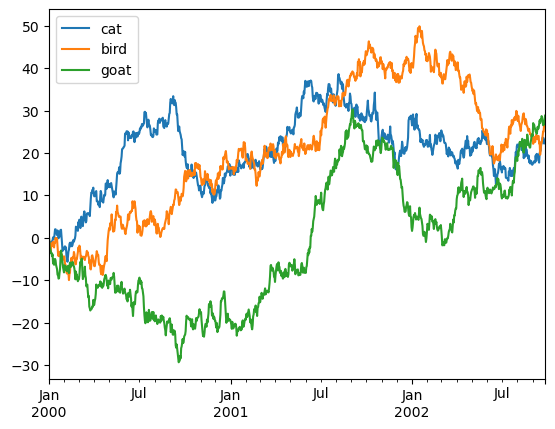

In [76]:
df = pd.DataFrame(np.random.randn(1000, 3),
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=['cat','bird','goat'])
df_cumsum = df.cumsum()
_ = df_cumsum.plot()